# Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Loading cleaned dataset

In [2]:
df = pd.read_csv('cleaned_dataset.csv')

with pd.option_context('display.max_columns', None):
  display(df.head())

,id,source_name,title,author_name,publish_date,accident_date,content,tags,day_of_the_week,time,time_in_hours,rush_hour,weekend_weekday,locality,road_name,road_type,vehicle_count,vehicle_involved,male_count,female_count,total_driver_count,min_age,max_age,young_driver_involved,adult_driver_involved,senior_driver_involved,child_involved,senior_involved,visibility,wind_speed,temperature,severity,ambulance_called,additional_source_name,additional_url
0,1,police,Collision between a car and a motorbike in Żur...,NaN,09/10/2025,09/10/2025,"Today, at around 0930hrs, the Police were info...",{},Thursday,morning,930,0,weekday,Zurrieq,Triq il-Belt Valletta,residential,2.0,car-motorcycle,1.0,1.0,2.0,61.0,67.0,0.0,0.0,1.0,0.0,1.0,10.0,3.7,23.0,high,1.0,Weatherspark,https://weatherspark.com
1,2,police,Car-motorcycle traffic accident,NaN,19/06/2025,18/06/2025,"Yesterday, at around 1830hrs, the Police were ...",{},Wednesday,evening,1830,0,weekday,Gudja,Triq Dawret il-Gudja,bypass,2.0,car-motorcycle,2.0,0.0,2.0,23.0,61.0,1.0,0.0,1.0,0.0,1.0,10.0,11.1,26.0,high,1.0,NaN,NaN
2,3,police,Car-motorcycle collision in Ħal Qormi,NaN,12/05/2025,12/05/2025,"Today, at around 0800hrs, the Police were info...",{},Monday,morning,800,1,weekday,Qormi,Valley Road,main road,2.0,van-motorcycle,2.0,0.0,2.0,29.0,34.0,0.0,1.0,0.0,0.0,0.0,10.0,27.8,20.0,high,1.0,NaN,NaN
3,4,police,Collision between motorcycle and car in Għaxaq,NaN,30/07/2025,29/07/2025,"Yesterday, at around 1800hrs, the Police were ...",{},Tuesday,evening,1800,1,weekday,Hal Ghaxaq,Triq Dawret Hal Ghaxaq,main road,2.0,car-motorcycle,2.0,0.0,2.0,29.0,42.0,0.0,1.0,0.0,0.0,0.0,10.0,38.9,26.0,high,1.0,NaN,NaN
4,5,police,Car-motorcycle collision,NaN,07/04/2025,06/04/2025,"Yesterday, at around quarter to nine in the ev...",{},Sunday,evening,2045,0,weekend,Rabat,Triq il-Buqana,bypass,2.0,car-motorcycle,2.0,0.0,2.0,25.0,41.0,0.0,1.0,0.0,0.0,0.0,10.0,18.5,15.0,high,1.0,NaN,NaN


## Exploratory Data Analysis

In [3]:
# Printing out the columns
df.columns

Index(['id', 'source_name', 'title', 'author_name', 'publish_date',
       'accident_date', 'content', 'tags', 'day_of_the_week', 'time',
       'time_in_hours', 'rush_hour', 'weekend_weekday', 'locality',
       'road_name', 'road_type', 'vehicle_count', 'vehicle_involved',
       'male_count', 'female_count', 'total_driver_count', 'min_age',
       'max_age', 'young_driver_involved', 'adult_driver_involved',
       'senior_driver_involved', 'child_involved', 'senior_involved',
       'visibility', 'wind_speed', 'temperature', 'severity',
       'ambulance_called', 'additional_source_name', 'additional_url'],
      dtype='object')

### Bar Chart - Number of Accidents by Road Type

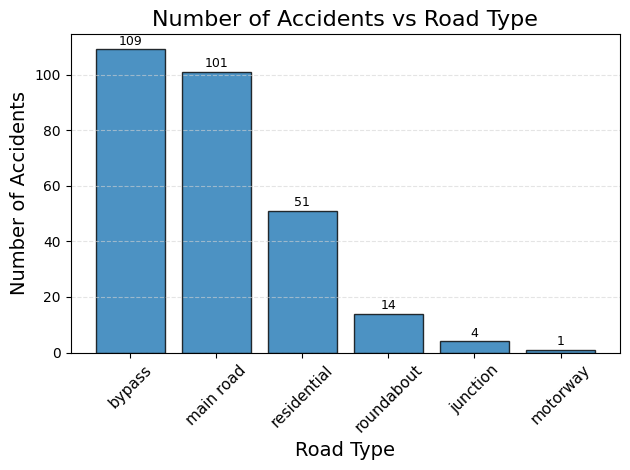

In [4]:
road_types_count = df['road_type'].value_counts()

labels = road_types_count.index
values = road_types_count.tolist()

bars = plt.bar(labels, values, edgecolor="black", alpha=0.8)

# Add values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{int(height)}", ha="center", va="bottom", fontsize=9)

# Customize the chart
plt.title("Number of Accidents vs Road Type", fontsize=16)
plt.xticks(rotation=45, ha="center", fontsize=11)
plt.xlabel("Road Type", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.6, color="#D3D3D3")
plt.tight_layout()
plt.show()

### Heatmap - Vehicle Count vs Severity

In [5]:
df['severity'].value_counts()

severity
high     140
High      69
fatal     24
med       24
Fatal     10
low        6
no         3
Low        3
High       1
Name: count, dtype: int64

In [6]:
df['vehicle_count'].value_counts()

vehicle_count
2.0    147
1.0    116
3.0     11
3.5      6
Name: count, dtype: int64

In [7]:
df['severity'] = df['severity'].apply(lambda x: x.lower().strip() if x != '' else 'unknown')

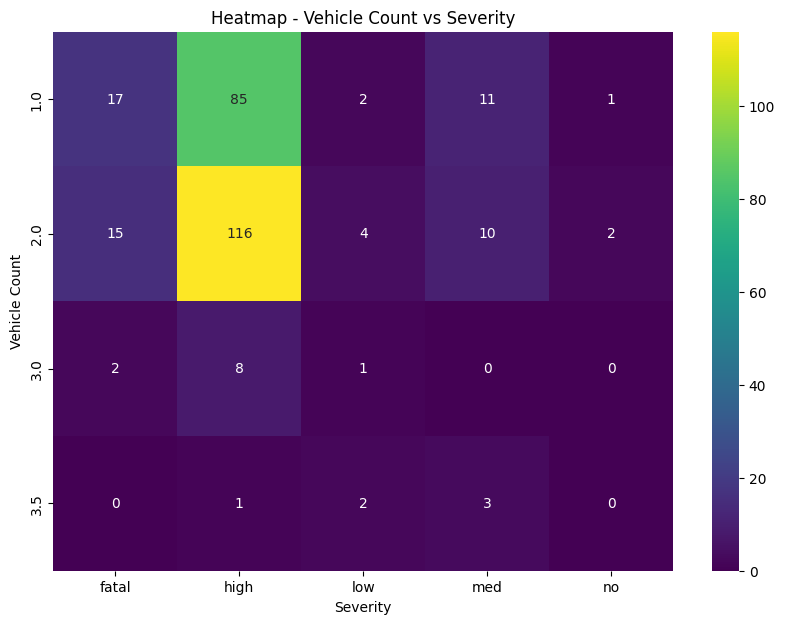

In [8]:
# Create contingency table
ct = pd.crosstab(df['vehicle_count'], df['severity'])

plt.figure(figsize=(10, 7))

# Draw heatmap
sns.heatmap(ct, annot=True, cmap="viridis", fmt='g')
plt.title('Heatmap - Vehicle Count vs Severity')
plt.ylabel('Vehicle Count')
plt.xlabel('Severity')
plt.show()